# Load datasets (ISOT - FakeNewsChallenge)

In [ ]:
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import transformers
from transformers import DistilBertTokenizer, TFDistilBertModel, TFDistilBertForSequenceClassification, DistilBertTokenizerFast
from transformers import MobileBertTokenizer, TFMobileBertModel
from transformers import AutoTokenizer, TFAlbertModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D,MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, BatchNormalization, Input, Concatenate
import torch
import requests
from tensorflow.keras import activations, optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **ISOT Title Embeddings - Dataset**

In [ ]:
embeddings_ISOT = np.load('/content/drive/MyDrive/NEWS_DATASET/embeddings_title_distilbert.npy')
labels_ISOT = np.load('/content/drive/MyDrive/NEWS_DATASET/labels_title_distilbert.npy')

In [ ]:
path = '/content/drive/MyDrive/NEWS_DATASET/final.csv'
df_ISOT = pd.read_csv(path,delimiter=',')

In [ ]:
def strip(row):
  return row['text'].strip('"')

df_ISOT['text'] = df_ISOT.apply(strip,axis=1)
df_ISOT.head()

,title,text,label
0,China says Trump plan to move embassy in Israe...,BEIJING (Reuters) - China expressed concern on...,true
1,India says ready for stronger U.S. ties after ...,NEW DELHI (Reuters) - India stood ready to fur...,true
2,A PRESIDENT WHO’S UNSERIOUS AND UNDIGNIFIED…DO...,America deserves so much better and should get...,fake
3,#DNC GIVES ANTI-HILLARY Dems Free Speech Cage ...,"It s just cleaner that way You know, keeping a...",fake
4,Castro meets North Korea minister amid hope Cu...,HAVANA (Reuters) - Cuban President Raul Castro...,true


In [ ]:
label_encoder = LabelEncoder()
label = df_ISOT['label']
labels_encoded = label_encoder.fit_transform(label)
df_ISOT['label'] = labels_encoded
df_ISOT.head()

,title,text,label
0,China says Trump plan to move embassy in Israe...,BEIJING (Reuters) - China expressed concern on...,1
1,India says ready for stronger U.S. ties after ...,NEW DELHI (Reuters) - India stood ready to fur...,1
2,A PRESIDENT WHO’S UNSERIOUS AND UNDIGNIFIED…DO...,America deserves so much better and should get...,0
3,#DNC GIVES ANTI-HILLARY Dems Free Speech Cage ...,"It s just cleaner that way You know, keeping a...",0
4,Castro meets North Korea minister amid hope Cu...,HAVANA (Reuters) - Cuban President Raul Castro...,1


## **FakeNewsChallenge Title Embeddings - Dataset**

### **train data**

In [ ]:
path = '/content/drive/MyDrive/FakeNewsChallenge/train.csv'
df = pd.read_csv(path,delimiter=',')

In [ ]:
df['Stance'] = df['Stance'].apply(lambda x: 1 if x.lower() in ['agree', 'discuss'] else 0)

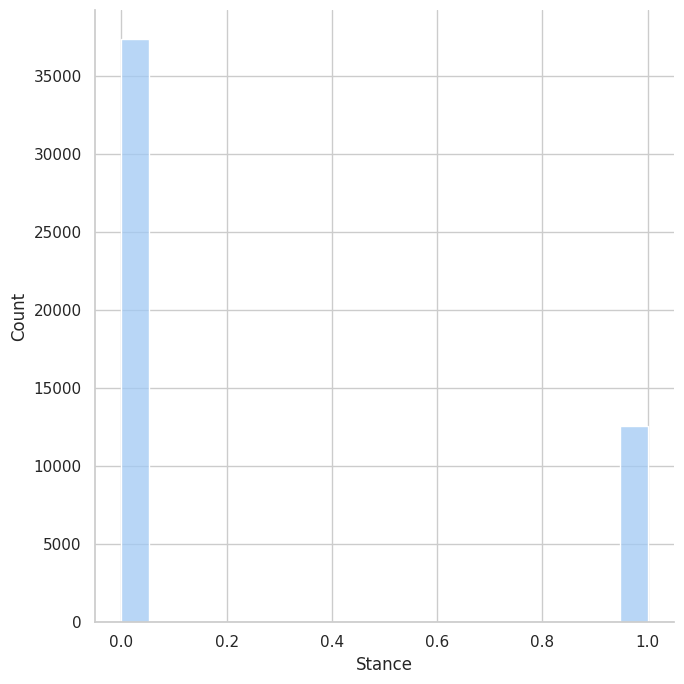

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.displot(df, x="Stance",height=7,aspect=1)

### **test data**

In [ ]:
path = '/content/drive/MyDrive/FakeNewsChallenge/test.csv'
df1 = pd.read_csv(path,delimiter=',')

In [ ]:
df1['Stance'] = df1['Stance'].apply(lambda x: 1 if x.lower() in ['agree', 'discuss'] else 0)

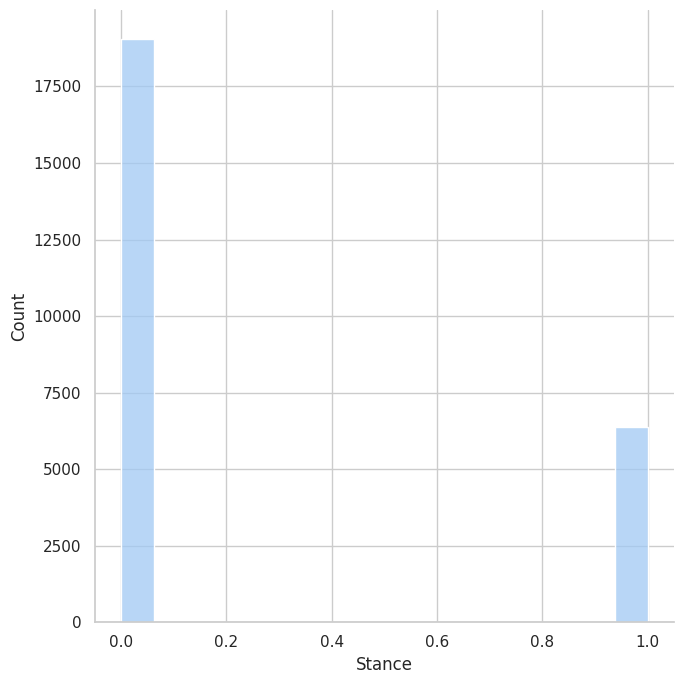

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.displot(df1, x="Stance",height=7,aspect=1)

### Embeddings

In [ ]:
train_embeddings_FNC = np.load('/content/drive/MyDrive/FakeNewsChallenge/embeddings_train_title_distilbert_bin.npy')
train_labels_FNC = np.load('/content/drive/MyDrive/FakeNewsChallenge/labels_train_title_distilbert_bin.npy')
test_embeddings_FNC = np.load('/content/drive/MyDrive/FakeNewsChallenge/embeddings_test_title_distilbert_bin.npy')
test_labels_FNC = np.load('/content/drive/MyDrive/FakeNewsChallenge/labels_test_title_distilbert_bin.npy')

In [ ]:
train_embeddings_FNC1 = np.load('/content/drive/MyDrive/FakeNewsChallenge/embeddings_train_text_distilbert_bin.npy')
train_labels_FNC1 = np.load('/content/drive/MyDrive/FakeNewsChallenge/labels_train_text_distilbert_bin.npy')
test_embeddings_FNC1 = np.load('/content/drive/MyDrive/FakeNewsChallenge/embeddings_test_text_distilbert_bin.npy')
test_labels_FNC1 = np.load('/content/drive/MyDrive/FakeNewsChallenge/labels_test_text_distilbert_bin.npy')

In [ ]:
train_embeddings_FNC1 = np.load('/content/drive/MyDrive/FakeNewsChallenge/embeddings_train_text_max_bin.npy')
train_labels_FNC1 = np.load('/content/drive/MyDrive/FakeNewsChallenge/labels_train_text_max_bin.npy')
test_embeddings_FNC1 = np.load('/content/drive/MyDrive/FakeNewsChallenge/embeddings_test_text_max_bin.npy')
test_labels_FNC1 = np.load('/content/drive/MyDrive/FakeNewsChallenge/labels_test_text_max_bin.npy')

# **Concatenate Embeddings**

## Title Embeddings

In [ ]:
train_embeddings_ISOT, test_embeddings_ISOT, train_labels_ISOT, test_labels_ISOT = train_test_split(embeddings_ISOT, labels_ISOT, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_embeddings = np.concatenate((train_embeddings_ISOT, train_embeddings_FNC), axis=0)
train_labels = np.concatenate((train_labels_ISOT,train_labels_FNC),axis=0)

In [ ]:
test_embeddings = np.concatenate((test_embeddings_ISOT, test_embeddings_FNC), axis=0)
test_labels = np.concatenate((test_labels_ISOT,test_labels_FNC),axis=0)

## Text Embeddings

In [ ]:
#εισάγουμε τα δεδομένα από τ' αποθηκευμένα αρχεία που δημιουργήσαμε νωρίτερα
embeddings = np.load('/content/drive/MyDrive/NEWS_DATASET/embeddings_text_distilbert.npy')
labels = np.load('/content/drive/MyDrive/NEWS_DATASET/labels_text_distilbert.npy')

In [ ]:
train_embeddings_ISOT1, test_embeddings_ISOT1, train_labels_ISOT1, test_labels_ISOT1 = train_test_split(embeddings, labels, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_embeddings_ISOT1.shape

(35918, 768)

In [ ]:
test_embeddings_ISOT1.shape

(8980, 768)

In [ ]:
train_embeddings_FNC1.shape

(49972, 768)

In [ ]:
test_embeddings_FNC1.shape

(25413, 768)

In [ ]:
train_embeddings1 = np.concatenate((train_embeddings_ISOT1, train_embeddings_FNC1), axis=0)
train_labels1 = np.concatenate((train_labels_ISOT1,train_labels_FNC1),axis=0)

In [ ]:
test_embeddings1 = np.concatenate((test_embeddings_ISOT1, test_embeddings_FNC1), axis=0)
test_labels1 = np.concatenate((test_labels_ISOT1,test_labels_FNC1),axis=0)

## Max-Worth Embeddings

In [ ]:
embeddings = np.load('/content/drive/MyDrive/NEWS_DATASET/embeddings_textmax_distilbert.npy')
labels = np.load('/content/drive/MyDrive/NEWS_DATASET/labels_textmax_distilbert.npy')

In [ ]:
train_embeddings_ISOT1, test_embeddings_ISOT1, train_labels_ISOT1, test_labels_ISOT1 = train_test_split(embeddings, labels, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_embeddings_ISOT1.shape

(35918, 768)

In [ ]:
test_embeddings_ISOT1.shape

(8980, 768)

In [ ]:
train_embeddings_FNC1.shape

(49972, 768)

In [ ]:
test_embeddings_FNC1.shape

(25413, 768)

In [ ]:
train_embeddings1 = np.concatenate((train_embeddings_ISOT1, train_embeddings_FNC1), axis=0)
train_labels1 = np.concatenate((train_labels_ISOT1,train_labels_FNC1),axis=0)

In [ ]:
test_embeddings1 = np.concatenate((test_embeddings_ISOT1, test_embeddings_FNC1), axis=0)
test_labels1 = np.concatenate((test_labels_ISOT1,test_labels_FNC1),axis=0)

# **DistilBERT-Text-Title**

In [ ]:
train_embeddings = tf.expand_dims(train_embeddings, axis=-1)
test_embeddings = tf.expand_dims(test_embeddings, axis=-1)

In [ ]:
train_embeddings.shape

TensorShape([85890, 768, 1])

In [ ]:
train_embeddings1 = tf.expand_dims(train_embeddings1, axis=-1)
test_embeddings1 = tf.expand_dims(test_embeddings1, axis=-1)

In [ ]:
train_embeddings.shape

TensorShape([85890, 768, 1])

In [ ]:
title_input = Input(shape=(768,), name='title_bert')
text_input = Input(shape=(768,), name='text_bert')
shared_dense = Dense(768, activation='relu')
title_output = shared_dense(title_input)
text_output = shared_dense(text_input)
concatenated = Concatenate(axis=1, name='concatenated')([title_output, text_output])
dropped_out = Dropout(0.5)(concatenated)
output = Dense(1, activation='sigmoid', name='output')(dropped_out)
model = Model(inputs=[title_input, text_input], outputs=output)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=[tf.squeeze(train_embeddings), tf.squeeze(train_embeddings1)],
          y=train_labels,
          epochs=9,
          batch_size=16)

Epoch 1/9
5369/5369 [==============================] - 27s 4ms/step - loss: 0.3914 - accuracy: 0.8228
Epoch 2/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3524 - accuracy: 0.8394
Epoch 3/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3388 - accuracy: 0.8457
Epoch 4/9
5369/5369 [==============================] - 19s 4ms/step - loss: 0.3302 - accuracy: 0.8488
Epoch 5/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3222 - accuracy: 0.8528
Epoch 6/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3164 - accuracy: 0.8553
Epoch 7/9
5369/5369 [==============================] - 19s 4ms/step - loss: 0.3108 - accuracy: 0.8570
Epoch 8/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3085 - accuracy: 0.8598
Epoch 9/9
5369/5369 [==============================] - 22s 4ms/step - loss: 0.3037 - accuracy: 0.8621


In [ ]:
test_loss, test_acc = model.evaluate([tf.squeeze(test_embeddings),tf.squeeze(test_embeddings1)], test_labels, verbose=2)

y_pred = model.predict([tf.squeeze(test_embeddings),tf.squeeze(test_embeddings1)])
y_pred = (y_pred > 0.5).astype('int32')

f1 = f1_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)

print("Test Accuracy:", test_acc)
print("Test F1 Score:", f1)
print("Test Recall:", recall)
print("Precision:", precision)

1075/1075 - 2s - loss: 0.5268 - accuracy: 0.7597 - 2s/epoch - 2ms/step
1075/1075 [==============================] - 3s 2ms/step
Test Accuracy: 0.7596604228019714
Test F1 Score: 0.5654505309641469
Test Recall: 0.5010714618466412
Precision: 0.6488116781276391


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title_bert (InputLayer)        [(None, 768)]        0           []                               
                                                                                                  
 text_bert (InputLayer)         [(None, 768)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 768)          590592      ['title_bert[0][0]',             
                                                                  'text_bert[0][0]']              
                                                                                                  
 concatenated (Concatenate)     (None, 1536)         0           ['dense[0][0]',              

1075/1075 [==============================] - 2s 2ms/step
[[20749  2911]
 [ 5355  5378]]


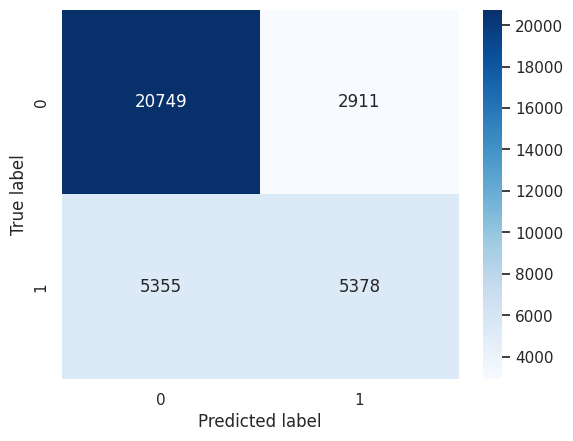

In [ ]:
y_pred = model.predict([tf.squeeze(test_embeddings),tf.squeeze(test_embeddings1)])
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(test_labels, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **DistilBERT-MaxWorth-Title**

In [ ]:
train_embeddings = tf.expand_dims(train_embeddings, axis=-1)
test_embeddings = tf.expand_dims(test_embeddings, axis=-1)

In [ ]:
train_embeddings.shape

TensorShape([85890, 768, 1])

In [ ]:
train_embeddings1 = tf.expand_dims(train_embeddings1, axis=-1)
test_embeddings1 = tf.expand_dims(test_embeddings1, axis=-1)

In [ ]:
train_embeddings.shape

TensorShape([85890, 768, 1])

In [ ]:
title_input = Input(shape=(768,), name='title_bert')
text_input = Input(shape=(768,), name='text_bert')
shared_dense = Dense(768, activation='relu')
title_output = shared_dense(title_input)
text_output = shared_dense(text_input)
concatenated = Concatenate(axis=1, name='concatenated')([title_output, text_output])
dropped_out = Dropout(0.5)(concatenated)
output = Dense(1, activation='sigmoid', name='output')(dropped_out)
model = Model(inputs=[title_input, text_input], outputs=output)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=[tf.squeeze(train_embeddings), tf.squeeze(train_embeddings1)],
          y=train_labels,
          epochs=9,
          batch_size=16)

Epoch 1/9
5369/5369 [==============================] - 27s 4ms/step - loss: 0.3918 - accuracy: 0.8244
Epoch 2/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3532 - accuracy: 0.8399
Epoch 3/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3390 - accuracy: 0.8461
Epoch 4/9
5369/5369 [==============================] - 21s 4ms/step - loss: 0.3289 - accuracy: 0.8494
Epoch 5/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3240 - accuracy: 0.8519
Epoch 6/9
5369/5369 [==============================] - 25s 5ms/step - loss: 0.3189 - accuracy: 0.8548
Epoch 7/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3140 - accuracy: 0.8571
Epoch 8/9
5369/5369 [==============================] - 20s 4ms/step - loss: 0.3092 - accuracy: 0.8601
Epoch 9/9
5369/5369 [==============================] - 21s 4ms/step - loss: 0.3064 - accuracy: 0.8605


In [ ]:
test_loss, test_acc = model.evaluate([tf.squeeze(test_embeddings),tf.squeeze(test_embeddings1)], test_labels, verbose=2)

y_pred = model.predict([tf.squeeze(test_embeddings),tf.squeeze(test_embeddings1)])
y_pred = (y_pred > 0.5).astype('int32')

f1 = f1_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)

print("Test Accuracy:", test_acc)
print("Test F1 Score:", f1)
print("Test Recall:", recall)
print("Precision:", precision)

1075/1075 - 2s - loss: 0.5736 - accuracy: 0.7500 - 2s/epoch - 2ms/step
1075/1075 [==============================] - 2s 2ms/step
Test Accuracy: 0.7500072717666626
Test F1 Score: 0.5609681372549019
Test Recall: 0.5117860803130532
Precision: 0.6206078409219298


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title_bert (InputLayer)        [(None, 768)]        0           []                               
                                                                                                  
 text_bert (InputLayer)         [(None, 768)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 768)          590592      ['title_bert[0][0]',             
                                                                  'text_bert[0][0]']              
                                                                                                  
 concatenated (Concatenate)     (None, 1536)         0           ['dense[0][0]',              

1075/1075 [==============================] - 2s 2ms/step
[[20302  3358]
 [ 5240  5493]]


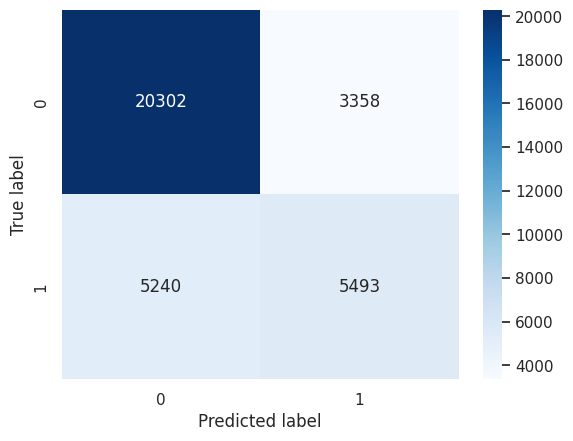

In [ ]:
y_pred = model.predict([tf.squeeze(test_embeddings),tf.squeeze(test_embeddings1)])
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(test_labels, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()